In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('Unite_Dataset_For_Credit_Risk_Default_Home Credit.csv')

In [4]:
df.iloc[:, 82:107].columns

Index(['SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL',
       'NUM_INSTALMENT_VERSION_x', 'NUM_INSTALMENT_NUMBER_x',
       'DAYS_INSTALMENT_x', 'AMT_PAYMENT_x', 'MONTHS_BALANCE_y', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM', 'SK_DPD',
       'SK_DPD_DEF', 'NUM_INSTALMENT_VERSION_y', 'NUM_INSTALMENT_NUMBER_y',
       'DAYS_INSTALMENT_y', 'AMT_PAYMENT_y'],
      dtype='object')

# difference: 'MONTHS_BALANCE_y',  'MONTHS_BALANCE_x'

# duplicated: 'NUM_INSTALMENT_NUMBER_y', 'NUM_INSTALMENT_VERSION_y', 'DAYS_INSTALMENT_y', 'AMT_PAYMENT_y' 

In [5]:
combine = pd.read_csv('combined.csv')

In [6]:
combine_train = combine.loc[combine['CLASSIFICATION'] == 'train data']
combine_train.shape

(307511, 97)

In [7]:
dfcut = combine_train.iloc[:, 75::]

In [8]:
dfcut.shape

(307511, 22)

In [9]:
dfcut.columns

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'DAYS_DECISION',
       'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL',
       'NUM_INSTALMENT_VERSION', 'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT',
       'AMT_PAYMENT', 'AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL',
       'AMT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'SK_DPD', 'SK_DPD_DEF'],
      dtype='object')

In [10]:
corr = dfcut.corrwith(combine['TARGET'])
corr = pd.DataFrame(corr)
corr.columns = ['correl']
corr = corr.reset_index()

In [11]:
corr

,index,correl
0,AMT_DOWN_PAYMENT,-0.023188
1,RATE_DOWN_PAYMENT,-0.031648
2,DAYS_DECISION,0.045898
3,SELLERPLACE_AREA,-0.002383
4,CNT_PAYMENT,0.027159
5,DAYS_FIRST_DRAWING,-0.047702
6,DAYS_FIRST_DUE,-0.009154
7,DAYS_LAST_DUE_1ST_VERSION,0.030473
8,DAYS_LAST_DUE,0.026323
9,DAYS_TERMINATION,0.025231


In [12]:
low = []
for i in range(corr.shape[0]):
    if corr.loc[i, 'correl'] <=0.02 and corr.loc[i, 'correl'] >= -0.02:
        low.append(corr.loc[i, 'index'])
low

['SELLERPLACE_AREA',
 'DAYS_FIRST_DUE',
 'NFLAG_INSURED_ON_APPROVAL',
 'NUM_INSTALMENT_NUMBER',
 'AMT_PAYMENT',
 'AMT_CREDIT_LIMIT_ACTUAL',
 'CNT_INSTALMENT_MATURE_CUM',
 'SK_DPD',
 'SK_DPD_DEF']

In [13]:
dfcut = dfcut.drop(columns = low)
dfcut.shape

(307511, 13)

In [14]:
col = ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'DAYS_DECISION', 'CNT_PAYMENT',
       'DAYS_FIRST_DRAWING', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NUM_INSTALMENT_VERSION', 'DAYS_INSTALMENT',
       'AMT_BALANCE', 'AMT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_CURRENT']

In [15]:
des = pd.read_csv('HomeCredit_columns_description.csv',  encoding= 'unicode_escape')

In [16]:
for i in col:
    display(des[des['Row'] == i])

,Unnamed: 0,Table,Row,Description,Special
179,182,previous_application.csv,AMT_DOWN_PAYMENT,Down payment on the previous application,NaN


,Unnamed: 0,Table,Row,Description,Special
186,189,previous_application.csv,RATE_DOWN_PAYMENT,Down payment rate normalized on previous credit,normalized


,Unnamed: 0,Table,Row,Description,Special
191,194,previous_application.csv,DAYS_DECISION,Relative to current application when was the d...,time only relative to the application


,Unnamed: 0,Table,Row,Description,Special
202,205,previous_application.csv,CNT_PAYMENT,Term of previous credit at application of the ...,NaN


,Unnamed: 0,Table,Row,Description,Special
205,208,previous_application.csv,DAYS_FIRST_DRAWING,Relative to application date of current applic...,time only relative to the application


,Unnamed: 0,Table,Row,Description,Special
207,210,previous_application.csv,DAYS_LAST_DUE_1ST_VERSION,Relative to application date of current applic...,time only relative to the application


,Unnamed: 0,Table,Row,Description,Special
208,211,previous_application.csv,DAYS_LAST_DUE,Relative to application date of current applic...,time only relative to the application


,Unnamed: 0,Table,Row,Description,Special
209,212,previous_application.csv,DAYS_TERMINATION,Relative to application date of current applic...,time only relative to the application


,Unnamed: 0,Table,Row,Description,Special
213,216,installments_payments.csv,NUM_INSTALMENT_VERSION,Version of installment calendar (0 is for cred...,NaN


,Unnamed: 0,Table,Row,Description,Special
215,218,installments_payments.csv,DAYS_INSTALMENT,When the installment of previous credit was su...,time only relative to the application


,Unnamed: 0,Table,Row,Description,Special
153,156,credit_card_balance.csv,AMT_BALANCE,Balance during the month of previous credit,NaN


,Unnamed: 0,Table,Row,Description,Special
156,159,credit_card_balance.csv,AMT_DRAWINGS_CURRENT,Amount drawing during the month of the previou...,NaN


,Unnamed: 0,Table,Row,Description,Special
166,169,credit_card_balance.csv,CNT_DRAWINGS_CURRENT,Number of drawings during this month on the pr...,NaN


array([[<AxesSubplot:title={'center':'AMT_DOWN_PAYMENT'}>,
        <AxesSubplot:title={'center':'RATE_DOWN_PAYMENT'}>,
        <AxesSubplot:title={'center':'DAYS_DECISION'}>,
        <AxesSubplot:title={'center':'CNT_PAYMENT'}>],
       [<AxesSubplot:title={'center':'DAYS_FIRST_DRAWING'}>,
        <AxesSubplot:title={'center':'DAYS_LAST_DUE_1ST_VERSION'}>,
        <AxesSubplot:title={'center':'DAYS_LAST_DUE'}>,
        <AxesSubplot:title={'center':'DAYS_TERMINATION'}>],
       [<AxesSubplot:title={'center':'NUM_INSTALMENT_VERSION'}>,
        <AxesSubplot:title={'center':'DAYS_INSTALMENT'}>,
        <AxesSubplot:title={'center':'AMT_BALANCE'}>,
        <AxesSubplot:title={'center':'AMT_DRAWINGS_CURRENT'}>],
       [<AxesSubplot:title={'center':'CNT_DRAWINGS_CURRENT'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

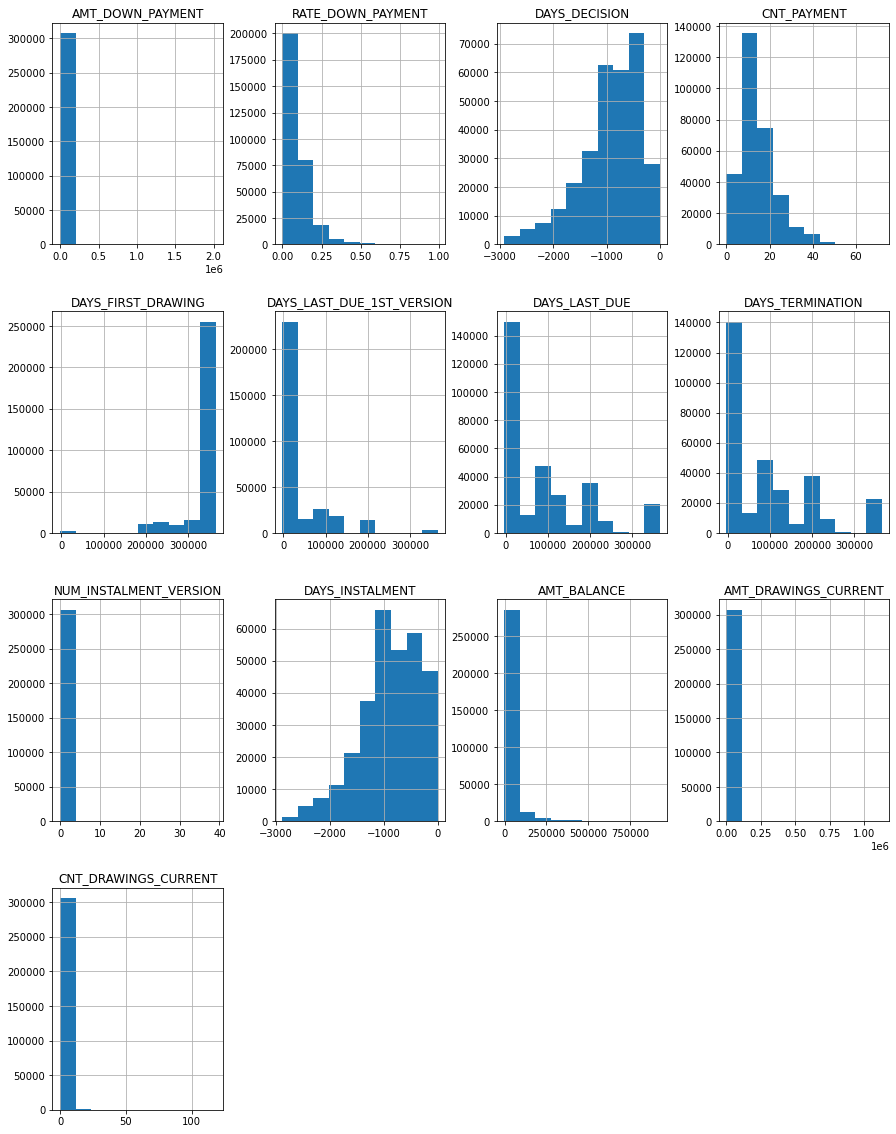

In [17]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
dfcut.hist(ax = ax)

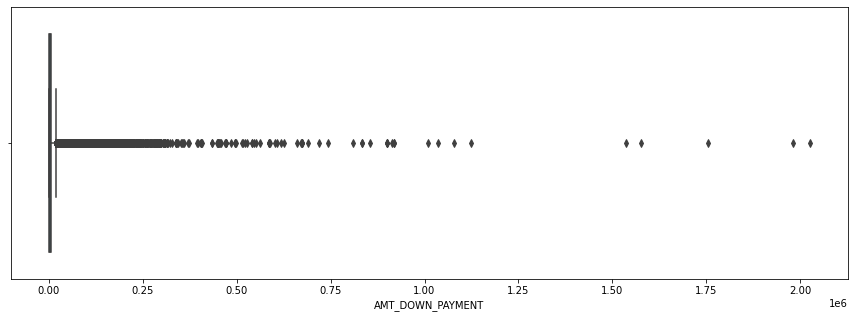

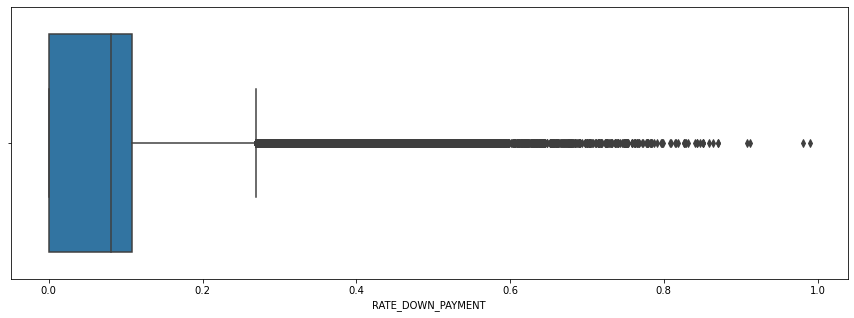

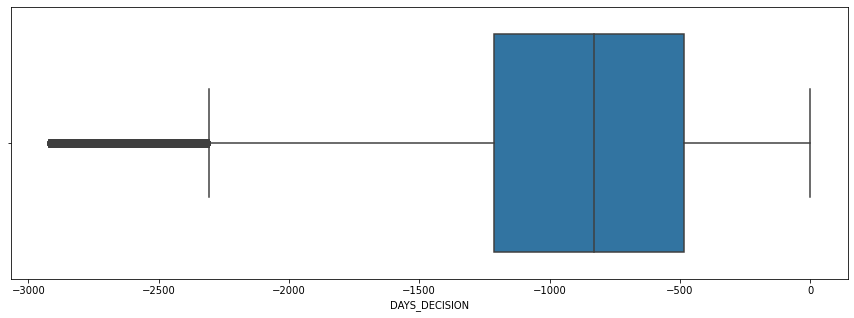

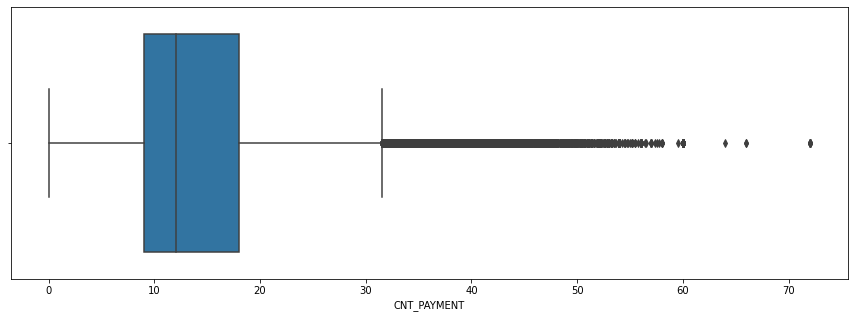

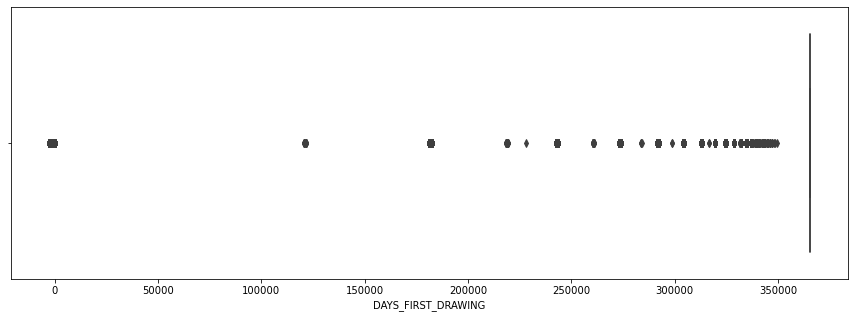

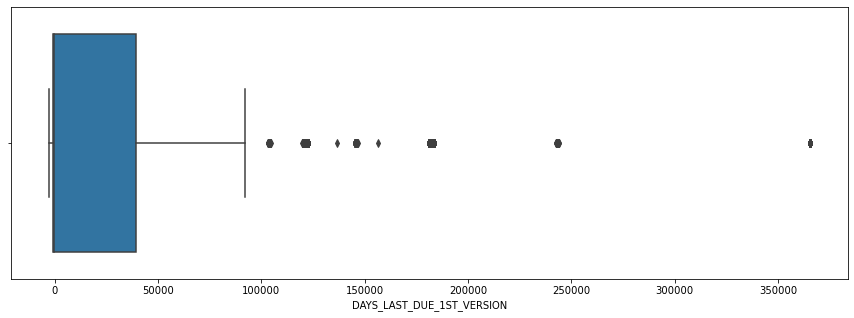

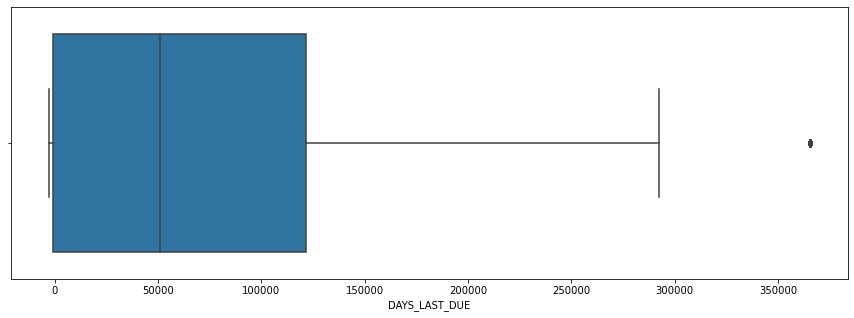

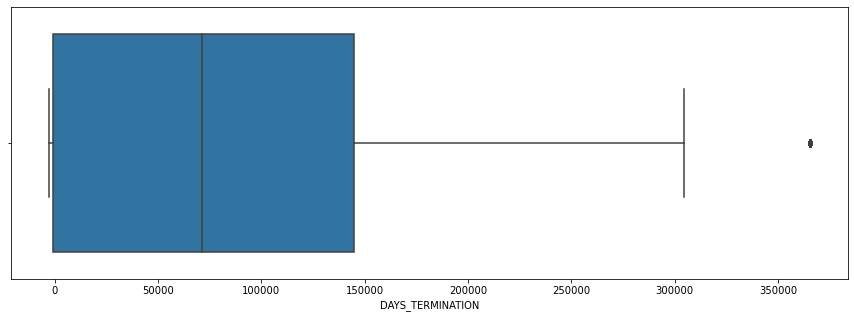

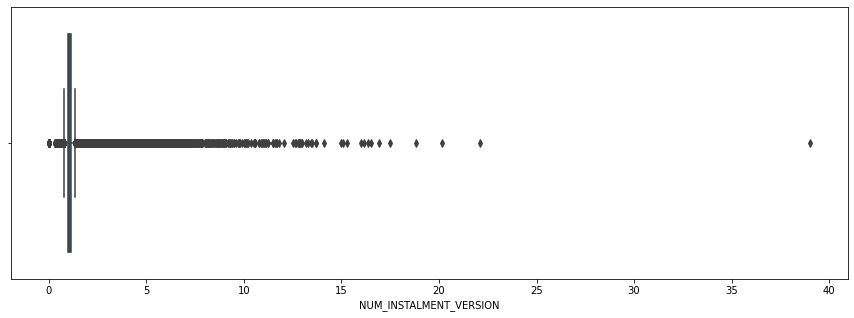

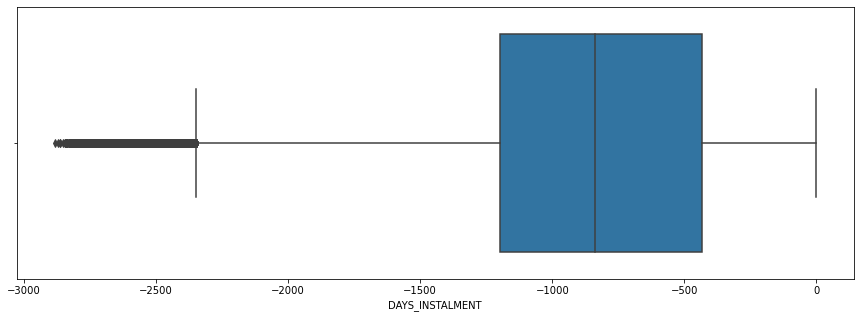

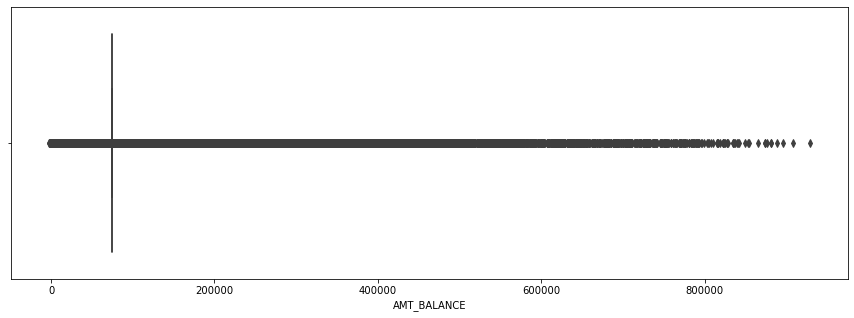

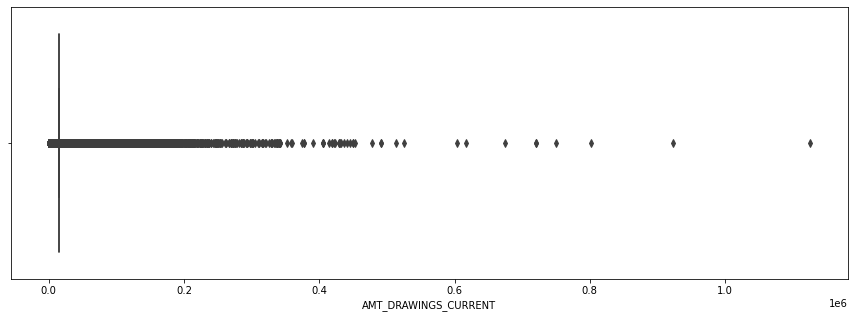

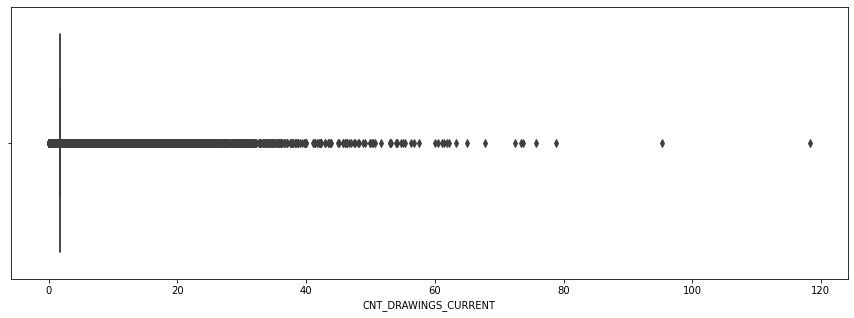

In [18]:
num = ['Int8', 'float16', 'float32', 'float64', 'int16', 'int32', 'int8']
numerical_features_lst = [f for f in dfcut.columns if dfcut[f].dtype in num]
for feature in numerical_features_lst:
    fig = plt.figure(figsize = (15, 5))
    sns.boxplot(x=feature,data=dfcut)
    

In [19]:
#to_drop = ['AMT_DOWN_PAYMENT', 'AMT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_CURRENT']
#dfcut = dfcut.drop(columns = to_drop)
to_drop = ['AMT_DOWN_PAYMENT']
dfcut = dfcut.drop(columns = to_drop)

In [20]:
to_drop = ['DAYS_DECISION', 'DAYS_FIRST_DRAWING', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NUM_INSTALMENT_VERSION']
dfcut = dfcut.drop(columns = to_drop)

Though the correlation is not the right measure of the dependence between the variable and the target, it does gives the idea about what is effectively more important than the other.
* **Drop columns have correlation between TARGET and feature in range (-0.02, 0.02). Because relationship between them are too weak**: 

['SELLERPLACE_AREA', 'DAYS_FIRST_DUE', 'NFLAG_INSURED_ON_APPROVAL', 'NUM_INSTALMENT_NUMBER', 'AMT_PAYMENT', 'AMT_CREDIT_LIMIT_ACTUAL', 'CNT_INSTALMENT_MATURE_CUM', 'SK_DPD', 'SK_DPD_DEF']
* **Drop columns ['AMT_DOWN_PAYMENT'] because both ['RATE_DOWN_PAYMENT'] and ['AMT_DOWN_PAYMENT'] reflect down payment on the previous application but ['RATE_DOWN_PAYMENT'] is more inclusive**


* **Drop columns seem like they are not affected the TARGET** : 

['DAYS_DECISION', 'DAYS_FIRST_DRAWING', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',  'NUM_INSTALMENT_VERSION']

* **New column ['LATE_PAYMENT'] = ['DAYS_ENTRY_PAYMENT'] - ['DAYS_INSTALMENT'] then delete 2 columns:['DAYS_ENTRY_PAYMENT' and ['DAYS_INSTALMENT']**


In [21]:
dfcut.columns

Index(['RATE_DOWN_PAYMENT', 'CNT_PAYMENT', 'DAYS_INSTALMENT', 'AMT_BALANCE',
       'AMT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_CURRENT'],
      dtype='object')

array([[<AxesSubplot:title={'center':'RATE_DOWN_PAYMENT'}>,
        <AxesSubplot:title={'center':'CNT_PAYMENT'}>],
       [<AxesSubplot:title={'center':'DAYS_INSTALMENT'}>,
        <AxesSubplot:title={'center':'AMT_BALANCE'}>],
       [<AxesSubplot:title={'center':'AMT_DRAWINGS_CURRENT'}>,
        <AxesSubplot:title={'center':'CNT_DRAWINGS_CURRENT'}>]],
      dtype=object)

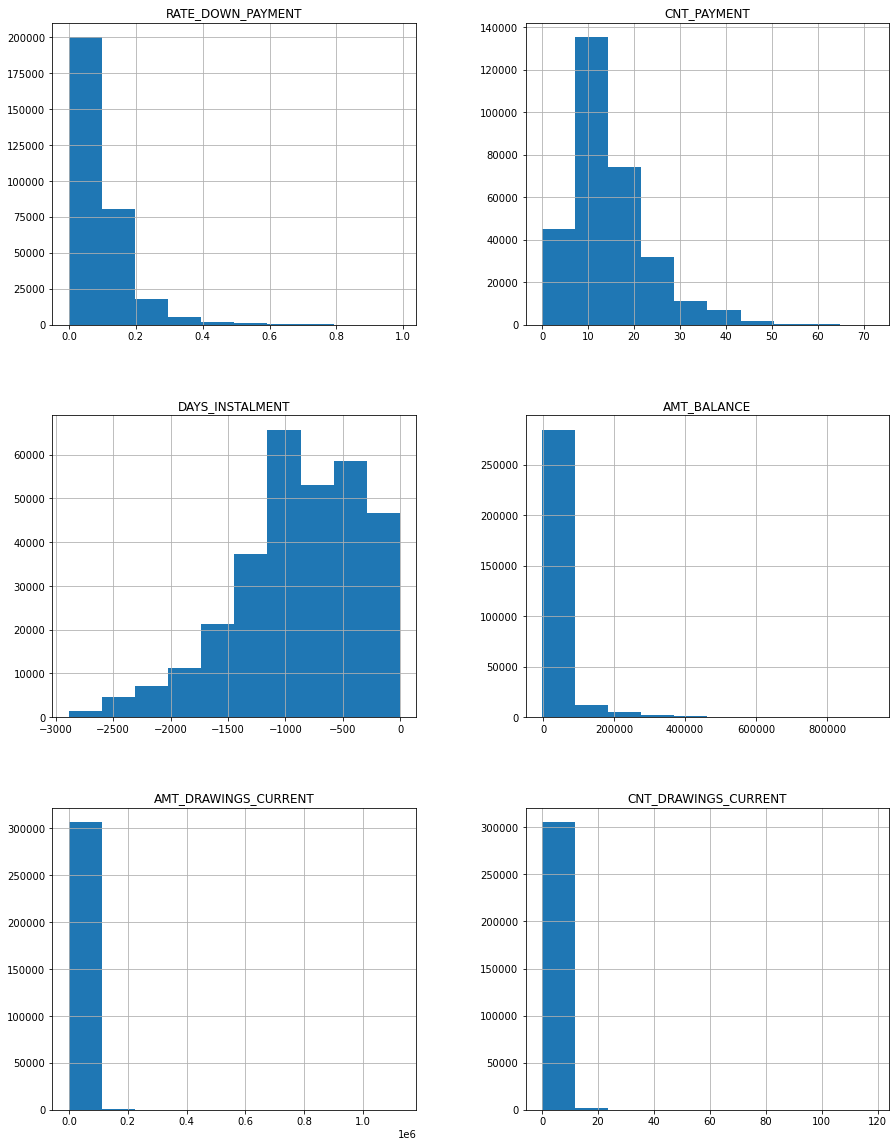

In [22]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
dfcut.hist(ax = ax)

In [23]:
def visual_numeric(combine_train, col):
    r0 = combine_train.loc[(combine_train['TARGET'] == 0), [col]]
    r1 = combine_train.loc[(combine_train['TARGET'] == 1), [col]]
    fig, ax = plt.subplots(figsize = (15,5))
    sns.kdeplot(r0[col], bw=0.5,label="Client without payment difficulty")
    sns.kdeplot(r1[col], bw=0.5,label="Client with payment difficulty")
    ax.xaxis.grid()
    ax.yaxis.grid()
    l1 = ['right', 'left', 'top', 'bottom']
    for i in l1:
        ax.spines[i].set_color('grey')
    ax.tick_params(left = False, bottom = False)
    ax.legend()

In [24]:
def boxplot(combine_train, col):
    fig, ax = plt.subplots(figsize = (15,5))
    sns.violinplot(x=combine_train['TARGET'], y=combine[col], data=combine_train, ax = ax)    

# RATE_DOWN_PAYMENT 
Down payment rate normalized on previous credit


In [25]:
combine_train['RATE_DOWN_PAYMENT'].describe()

count    307511.000000
mean          0.081865
std           0.084438
min          -0.000008
25%           0.000000
50%           0.081400
75%           0.107800
max           0.989700
Name: RATE_DOWN_PAYMENT, dtype: float64

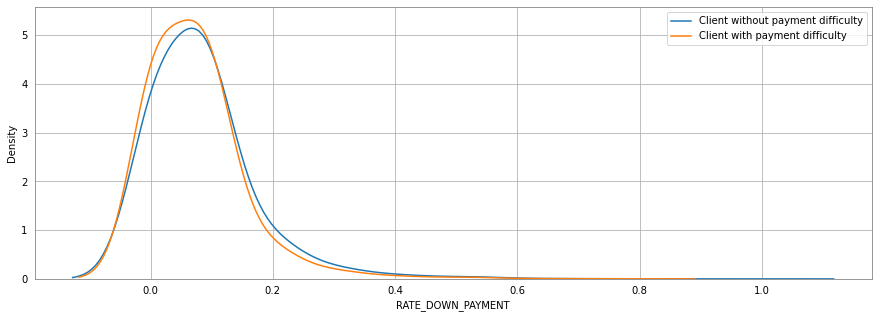

In [26]:
visual_numeric(combine_train, 'RATE_DOWN_PAYMENT')

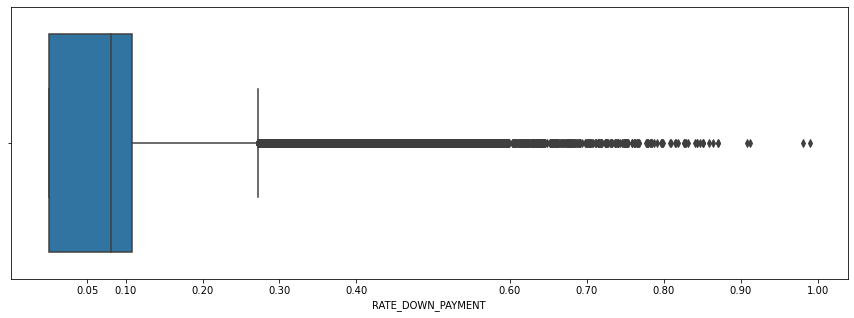

In [27]:
r0 = combine_train.loc[(combine_train['TARGET'] == 0), ['RATE_DOWN_PAYMENT']]
fig, ax = plt.subplots(figsize = (15,5))
sns.boxplot(x='RATE_DOWN_PAYMENT',data=r0)
ax.set_xticks([0.1, 0.2, 0.3, 0.4, .05, 0.6, 0.7, 0.8, 0.9, 1])

<AxesSubplot:xlabel='RATE_DOWN_PAYMENT'>

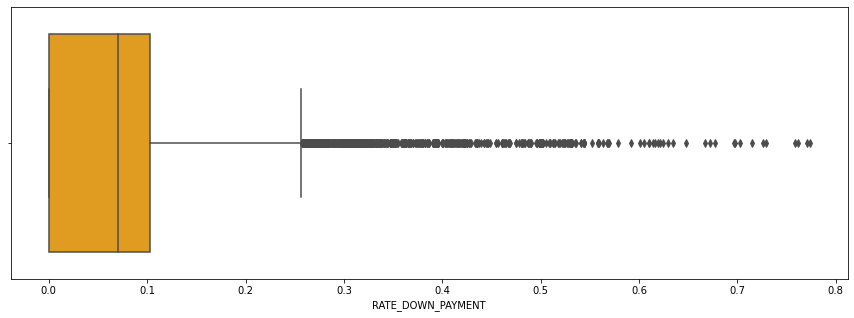

In [28]:
r1 = combine_train.loc[(combine_train['TARGET'] == 1), ['RATE_DOWN_PAYMENT']]
fig, ax = plt.subplots(figsize = (15,5))
sns.boxplot(x='RATE_DOWN_PAYMENT',data=r1, color = 'orange')

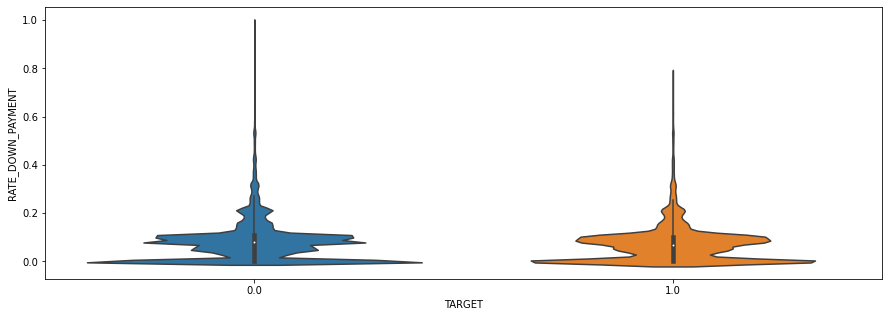

In [29]:
boxplot(combine_train, 'RATE_DOWN_PAYMENT')

* **Interestingly that in this feature clients with payment difficulty tend to have higher RATE_DOWN_PAYMENT than the cilents who are capability of return the loans**
* **Client without payment difficulty have higher RATE_DOWN_PAYMENT = 0 than the others

# CNT_PAYMENT
Term of previous credit at application of the previous application

In [30]:
combine_train['CNT_PAYMENT'].describe()

count    307511.000000
mean         14.530773
std           8.185674
min           0.000000
25%           9.000000
50%          12.000000
75%          18.000000
max          72.000000
Name: CNT_PAYMENT, dtype: float64

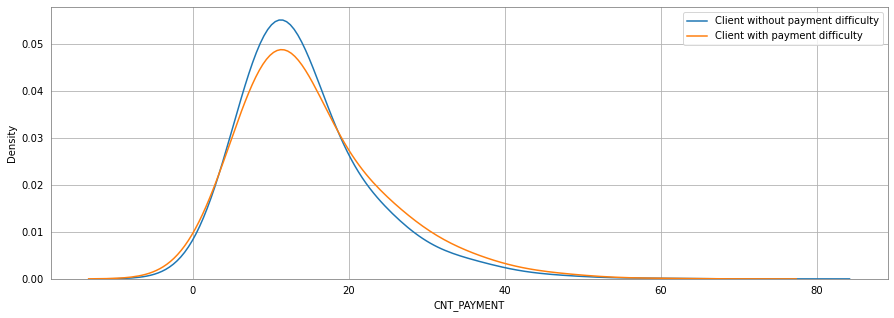

In [31]:
visual_numeric(combine_train, 'CNT_PAYMENT')

<AxesSubplot:xlabel='CNT_PAYMENT'>

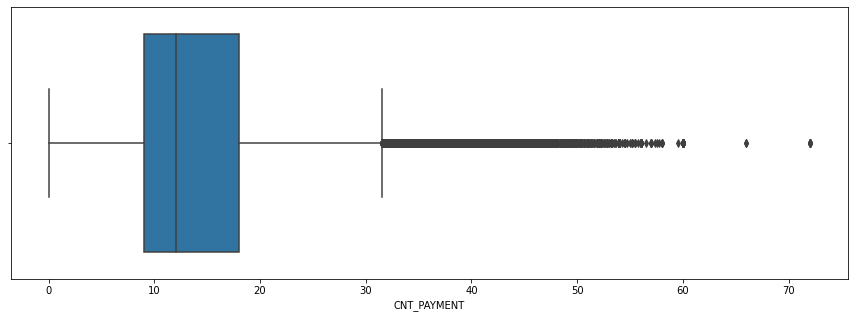

In [32]:
r0 = combine_train.loc[(combine_train['TARGET'] == 0), ['CNT_PAYMENT']]
fig, ax = plt.subplots(figsize = (15,5))
sns.boxplot(x='CNT_PAYMENT',data=r0)

<AxesSubplot:xlabel='CNT_PAYMENT'>

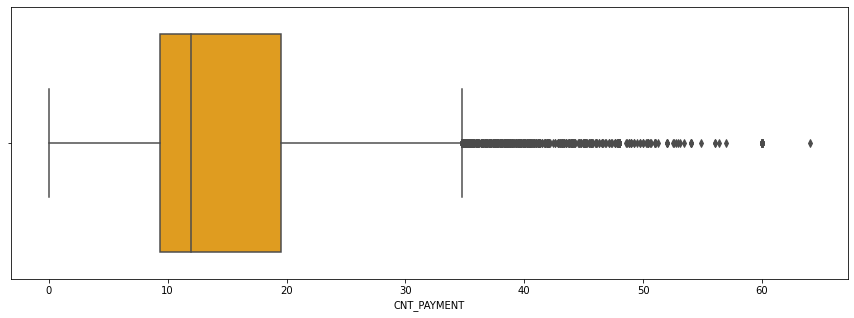

In [33]:
r1 = combine_train.loc[(combine_train['TARGET'] == 1), ['CNT_PAYMENT']]
fig, ax = plt.subplots(figsize = (15,5))
sns.boxplot(x='CNT_PAYMENT',data=r1, color = 'orange')

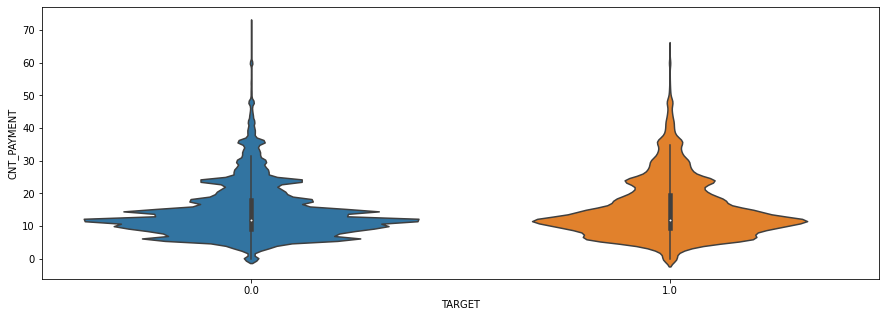

In [34]:
boxplot(combine_train, 'CNT_PAYMENT')

* **Term of both type of client tend to concentrate between 9 to less than 20**
* **Client without payment difficulty have a wider range (0, 72) than other**

# DAYS_INSTALMENT
When the installment of previous credit was supposed to be paid (relative to application date of current loan)

In [35]:
dfcut['DAYS_INSTALMENT'].describe()

count    307511.000000
mean       -876.295198
std         550.684484
min       -2884.000000
25%       -1199.000000
50%        -840.000000
75%        -432.000000
max          -3.000000
Name: DAYS_INSTALMENT, dtype: float64

In [37]:
#combine_train['LATE_PAYMENT'] = combine_train['DAYS_ENTRY_PAYMENT'] - combine_train['DAYS_INSTALMENT']

# Dung correlation xoa mat cot ['DAYS_ENTRY_PAYMENT'] nen k visual nua

# AMT_BALANCE
What the client actually paid on previous credit on this installment

In [38]:
dfcut['AMT_BALANCE'].describe()

count    307511.000000
mean      74568.736112
std       57198.175237
min       -2930.232700
25%       74206.900000
50%       74206.900000
75%       74206.900000
max      928686.300000
Name: AMT_BALANCE, dtype: float64

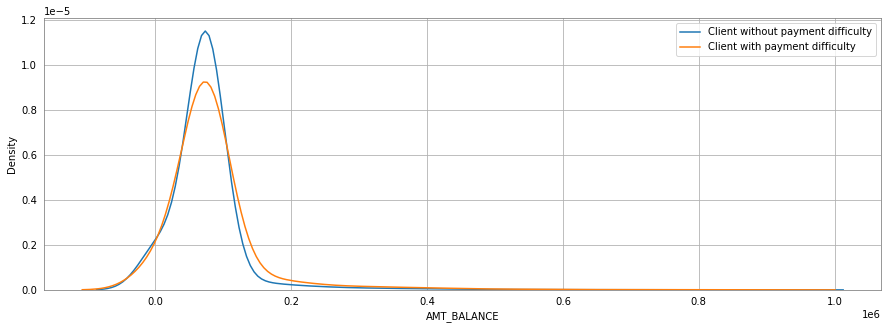

In [39]:
visual_numeric(combine_train, 'AMT_BALANCE')

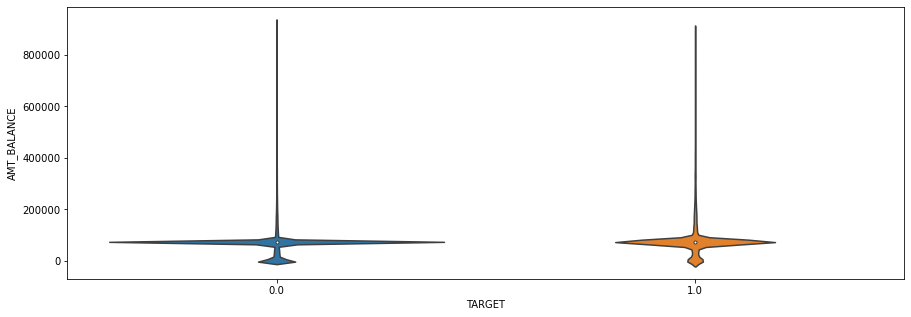

In [40]:
boxplot(combine_train, 'AMT_BALANCE')

* **As expected the amount of what client paid on previous credit of cliient that are capability are higher than the rest**

# AMT_DRAWINGS_CURRENT
Amount drawing during the month of the previous credit

In [41]:
dfcut['AMT_DRAWINGS_CURRENT'].describe()

count    3.075110e+05
mean     1.506550e+04
std      1.401103e+04
min      0.000000e+00
25%      1.498583e+04
50%      1.498583e+04
75%      1.498583e+04
max      1.125000e+06
Name: AMT_DRAWINGS_CURRENT, dtype: float64

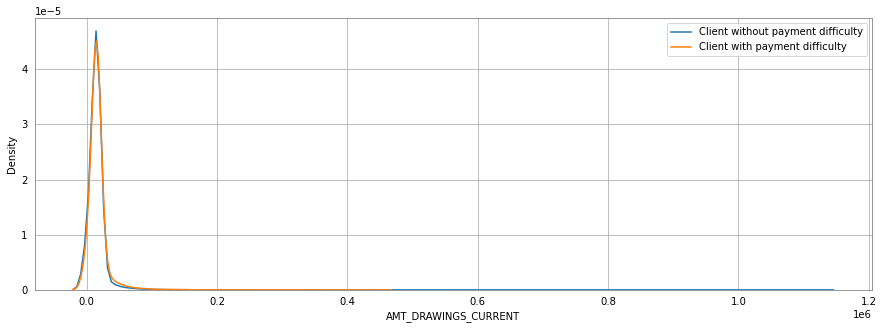

In [42]:
visual_numeric(combine_train, 'AMT_DRAWINGS_CURRENT')

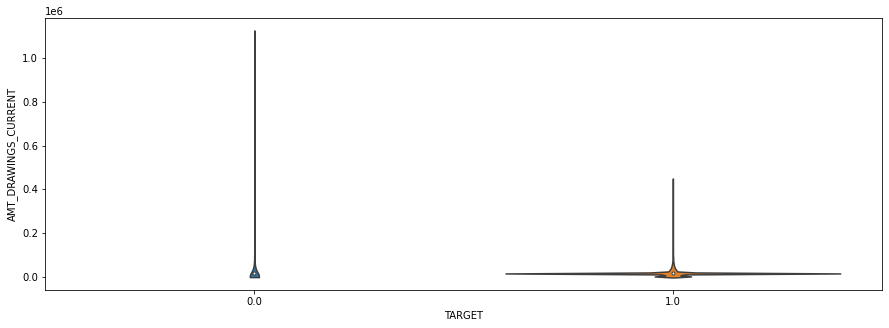

In [43]:
boxplot(combine_train, 'AMT_DRAWINGS_CURRENT')

* **In this feature we could clearly see that the one with payment difficulty are tend to withdraw more than the other**
* **Otherwise clients without payment difficulty have wider range of amount drawings**

# CNT_DRAWINGS_CURRENT
Number of drawings during this month on the previous credit

In [44]:
dfcut['CNT_DRAWINGS_CURRENT'].describe()

count    307511.000000
mean          1.687325
std           1.952708
min           0.000000
25%           1.681438
50%           1.681438
75%           1.681438
max         118.250000
Name: CNT_DRAWINGS_CURRENT, dtype: float64

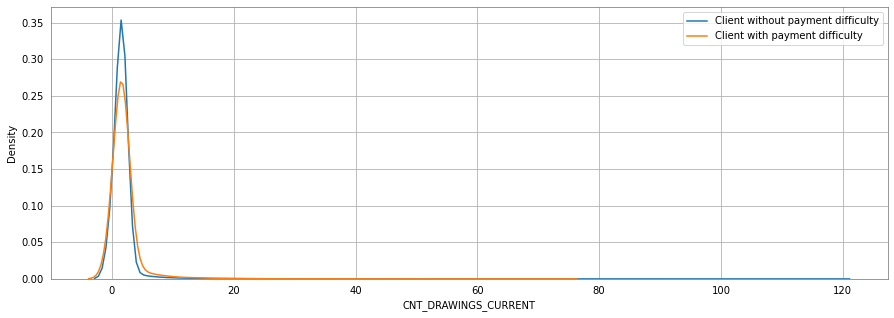

In [45]:
visual_numeric(combine_train, 'CNT_DRAWINGS_CURRENT')

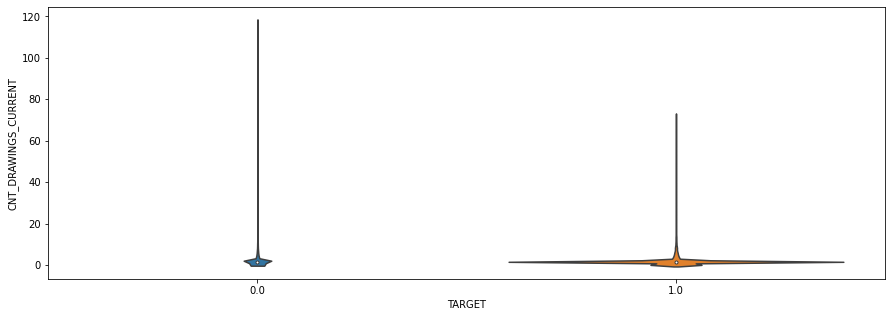

In [46]:
boxplot(combine_train, 'CNT_DRAWINGS_CURRENT')

* **From the boxplot we could see that client with payment difficulty tend to drawing more time than other, they may have problem with liquidity**